<a href="https://colab.research.google.com/github/MariaM0ura/Desafio/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Dhauz

In [1013]:
import pandas as pd
import numpy as np
import os

In [1014]:
df = pd.read_csv('/content/financiamento.csv')

In [1015]:
df.head()

,Unnamed: 0,ID,financiamento_max,sexo,educacao,estado_civil,ano_nasc,st_pagamento_lag_1,st_pagamento_lag_2,st_pagamento_lag_3,...,divida_lag_4,divida_lag_5,divida_lag_6,pago_lag_1,pago_lag_2,pago_lag_3,pago_lag_4,pago_lag_5,pago_lag_6,inadimplente
0,0,16609,270000,M,2,SOLTEIRO,1996,1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
1,1,19850,870000,F,1,SOLTEIRO,1991,0,0,0,...,10335,12000,13463,1500,2016,5000,2000,1463,3365,0
2,2,15921,630000,F,1,SOLTEIRO,1997,0,0,0,...,51877,44293,38215,4000,5000,2000,2540,3000,3000,0
3,3,22050,750000,F,2,CASADO,1996,0,0,0,...,15353,325,325,35018,1000,20000,325,325,318,0
4,4,1315,150000,F,1,CASADO,1988,2,0,0,...,5738,6461,4822,1200,1000,91,11283,0,1000,0


## Tratamento de Dados

In [1016]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
financiamento_max,0
sexo,0
educacao,0
estado_civil,0
ano_nasc,0
st_pagamento_lag_1,0
st_pagamento_lag_2,0
st_pagamento_lag_3,0


In [1017]:
df['educacao'] = df['educacao'].replace([0, 5, 6], 4)

In [1018]:
df['estado_civil'] = df['estado_civil'].replace([0, '0'], 'SEM INFO')

In [1019]:
df['idade'] = 2025 - df['ano_nasc']
df['idade'].describe()

,idade
count,30000.000000
mean,35.485500
std,9.217904
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


In [1020]:
moda = df['idade'].mode()[0]
print(df[df['idade'] == moda]['idade'].value_counts())

idade
29    1605
Name: count, dtype: int64


## Analise Exploratoria - EDA

In [1021]:
df.describe()

,Unnamed: 0,ID,financiamento_max,educacao,ano_nasc,st_pagamento_lag_1,st_pagamento_lag_2,st_pagamento_lag_3,st_pagamento_lag_4,st_pagamento_lag_5,...,divida_lag_5,divida_lag_6,pago_lag_1,pago_lag_2,pago_lag_3,pago_lag_4,pago_lag_5,pago_lag_6,inadimplente,idade
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,15000.500000,5.024530e+05,1.842267,1989.514500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,35.485500
std,8660.398374,8660.398374,3.892430e+05,0.744494,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,9.217904
min,0.000000,1.000000,3.000000e+04,1.000000,1946.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7499.750000,7500.750000,1.500000e+05,1.000000,1984.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,28.000000
50%,14999.500000,15000.500000,4.200000e+05,2.000000,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,34.000000
75%,22499.250000,22500.250000,7.200000e+05,2.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,41.000000
max,29999.000000,30000.000000,3.000000e+06,4.000000,2004.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,79.000000


### Perfil de Cliente

In [1022]:
import seaborn as sns
import matplotlib.pyplot as plt

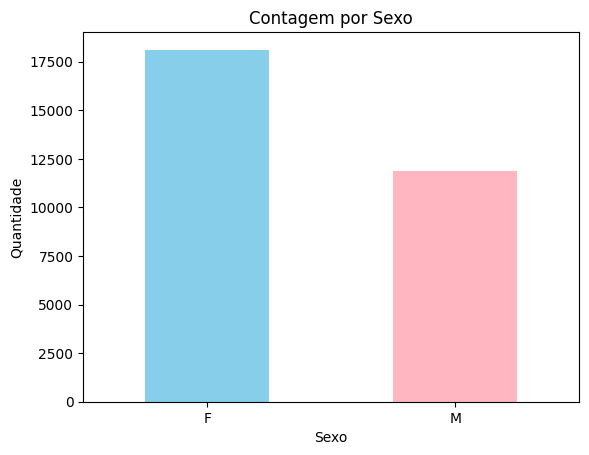

In [1023]:
df['sexo'].value_counts().plot(kind='bar', color=['skyblue', 'lightpink'])

plt.title('Contagem por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

plt.show()


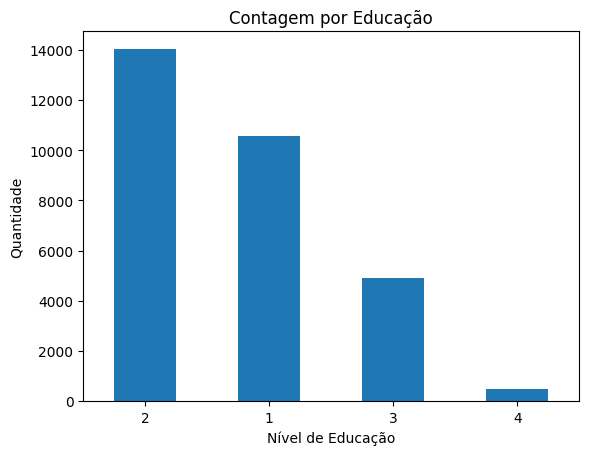

In [1024]:
df['educacao'].value_counts().plot(kind='bar')

plt.title('Contagem por Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade')
plt.xticks(rotation=1)

plt.show()


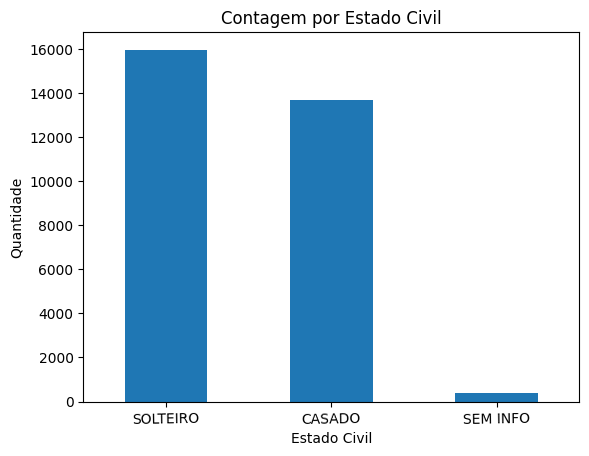

In [1025]:
df['estado_civil'].value_counts().plot(kind='bar')
plt.title('Contagem por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade')
plt.xticks(rotation=1)
plt.show()

In [1026]:
df['idade'] = 2025 - df['ano_nasc']
df['idade'].describe()

,idade
count,30000.000000
mean,35.485500
std,9.217904
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


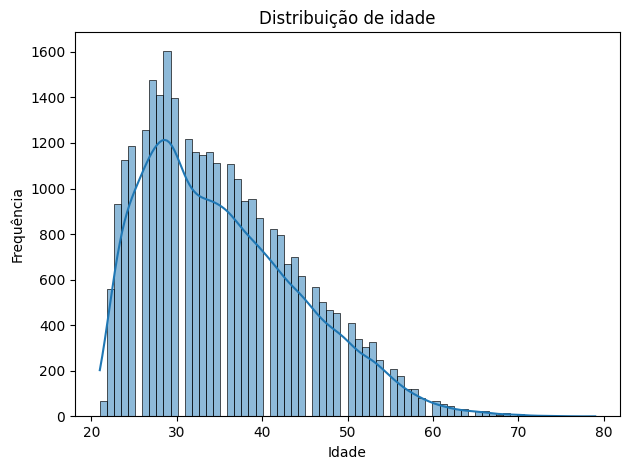

In [1027]:
sns.histplot(data=df, x='idade', kde=True)

plt.title('Distribuição de idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=1)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Pagamentos

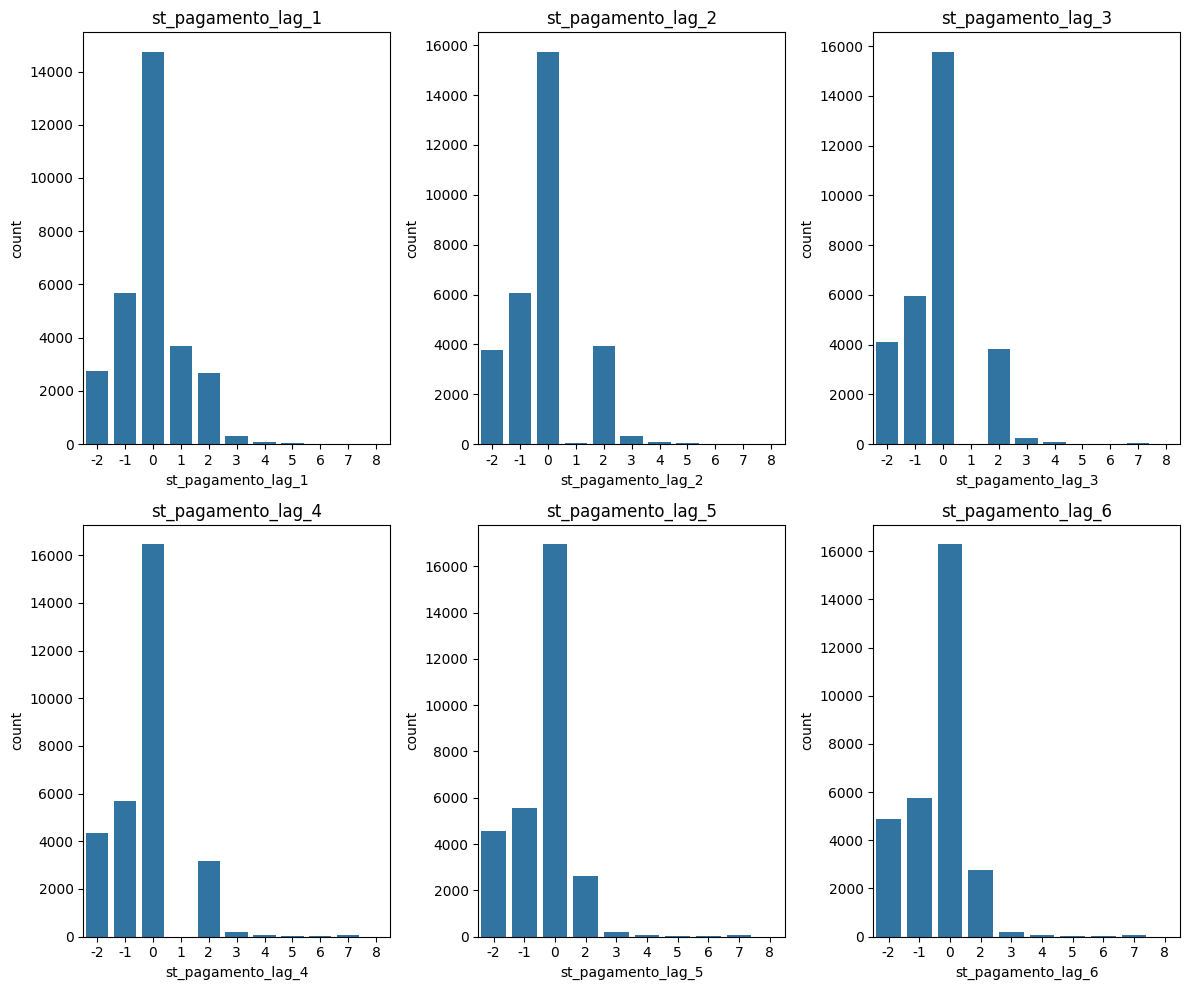

In [1028]:
plt.figure(figsize=(12, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.countplot(x=f'st_pagamento_lag_{i}', data=df)
    plt.title(f'st_pagamento_lag_{i}')
plt.tight_layout()
plt.show()

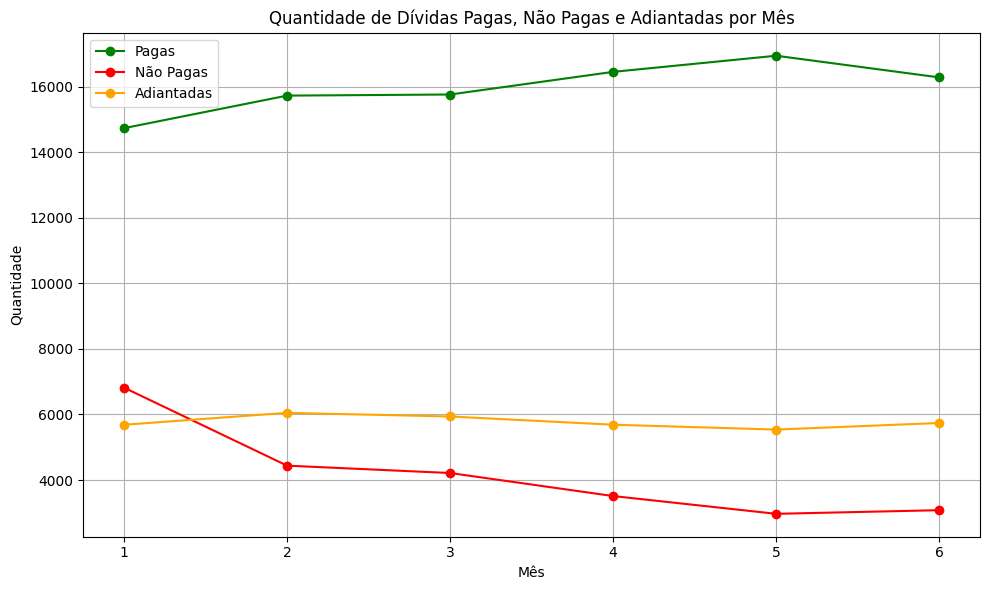

In [1029]:

meses = [1, 2, 3, 4, 5, 6]
pagas_por_mes = []
nao_pagas_por_mes = []
adiantadas_por_mes = []

for mes in meses:
    st_pagamento = f'st_pagamento_lag_{mes}'

    pagas_por_mes.append(df[df[st_pagamento] == 0].shape[0])
    nao_pagas_por_mes.append(df[df[st_pagamento] > 0].shape[0])
    adiantadas_por_mes.append(df[df[st_pagamento] == -1].shape[0])

plt.figure(figsize=(10, 6))

plt.plot(meses, pagas_por_mes, label='Pagas', marker='o', color='green')
plt.plot(meses, nao_pagas_por_mes, label='Não Pagas', marker='o', color='red')
plt.plot(meses, adiantadas_por_mes, label='Adiantadas', marker='o', color='orange')

plt.title('Quantidade de Dívidas Pagas, Não Pagas e Adiantadas por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(meses)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


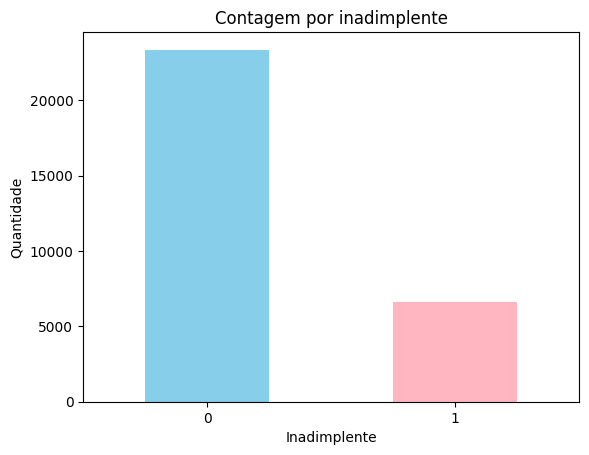

In [1030]:
df['inadimplente'].value_counts().plot(kind='bar', color=['skyblue', 'lightpink'])

plt.title('Contagem por inadimplente')
plt.xlabel('Inadimplente')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

plt.show()


### Perfil de Pagamente


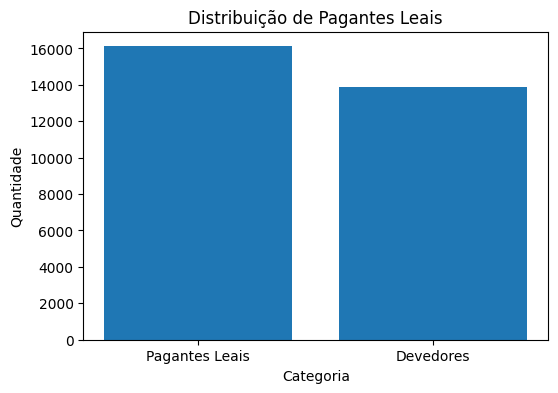

In [1031]:
pagantes_leais = (df[['st_pagamento_lag_1', 'st_pagamento_lag_2', 'st_pagamento_lag_3', 'st_pagamento_lag_4', 'st_pagamento_lag_5', 'st_pagamento_lag_6']] >= 0).all(axis=1)
total_pagantes_leais = pagantes_leais.sum()
total_nao_pagantes_leais = len(df) - total_pagantes_leais

labels = ['Pagantes Leais', 'Devedores']
valores = [total_pagantes_leais, total_nao_pagantes_leais]

plt.figure(figsize=(6, 4))
plt.bar(labels, valores)

plt.title('Distribuição de Pagantes Leais')
plt.ylabel('Quantidade')
plt.xlabel('Categoria')

plt.show()


In [1032]:
pagantes_leais_perfil = df[pagantes_leais][['sexo', 'idade', 'educacao', 'estado_civil']]

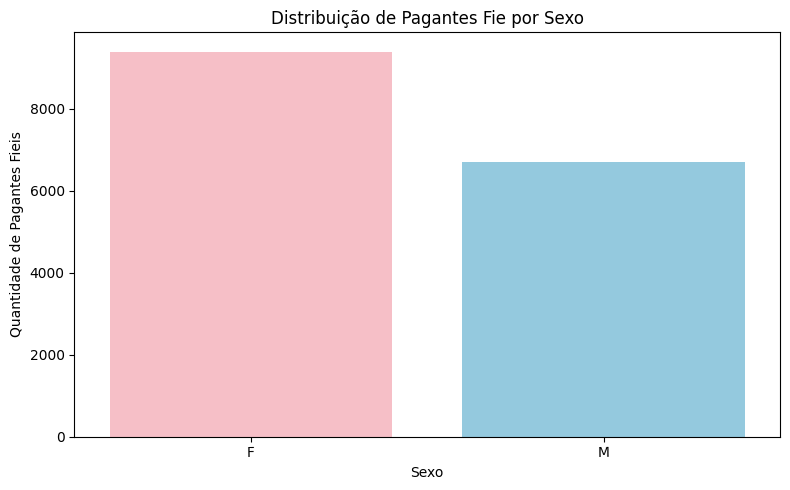

In [1033]:
sexo_counts = pagantes_leais_perfil['sexo'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sexo_counts.index, y=sexo_counts.values,hue=sexo_counts.index, palette={'M': 'skyblue', 'F': 'lightpink'})
plt.title('Distribuição de Pagantes Fie por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Pagantes Fieis')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

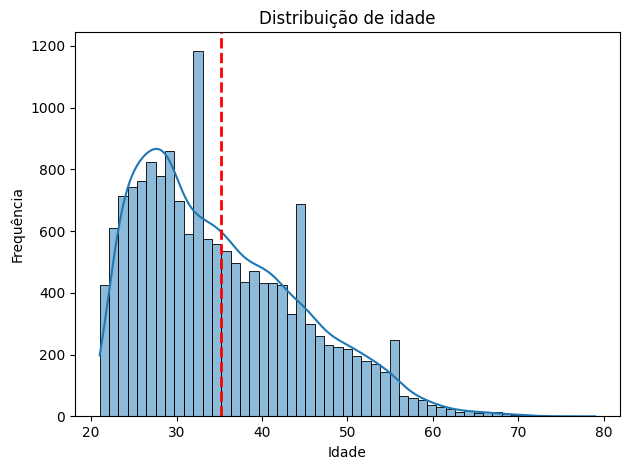

In [1034]:
idade_media = pagantes_leais_perfil['idade'].mean()
sns.histplot(data=pagantes_leais_perfil, x='idade', kde=True)
plt.title('Distribuição de idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.axvline(idade_media, color='red', linestyle='dashed', linewidth=2, label=f'Média de Idade: {idade_media:.2f}')
plt.xticks(rotation=1)

plt.tight_layout()
plt.show()

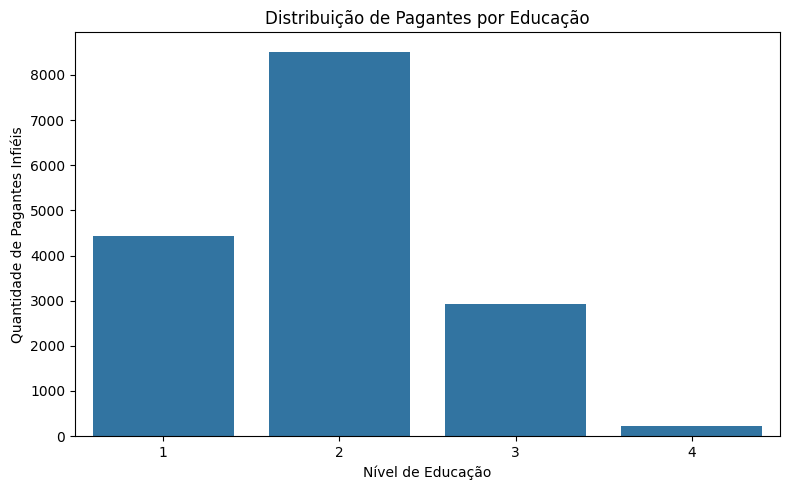

In [1035]:
educacao_counts = pagantes_leais_perfil['educacao'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=educacao_counts.index, y=educacao_counts.values)
plt.title('Distribuição de Pagantes por Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade de Pagantes Infiéis')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

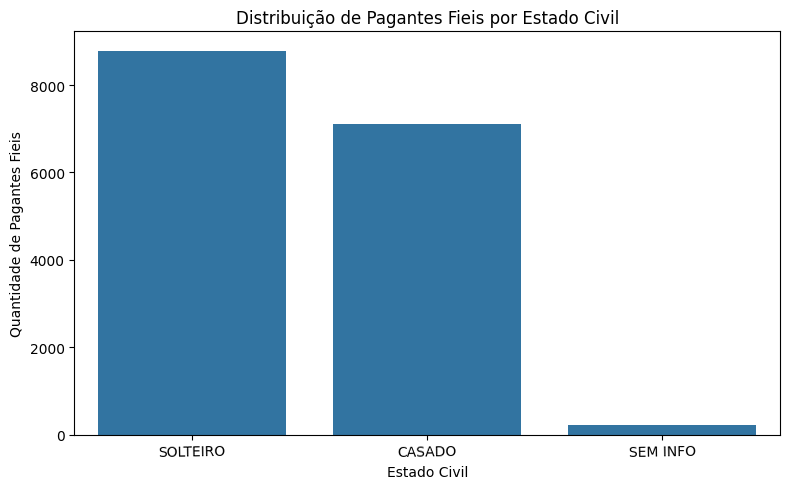

In [1036]:
estado_civil = pagantes_leais_perfil['estado_civil'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=estado_civil.index, y=estado_civil.values)
plt.title('Distribuição de Pagantes Fieis por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de Pagantes Fieis')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

### Perfil de Devedores

In [1037]:
nao_pagantes = (df[['st_pagamento_lag_1', 'st_pagamento_lag_2', 'st_pagamento_lag_3', 'st_pagamento_lag_4', 'st_pagamento_lag_5', 'st_pagamento_lag_6']] >= 1).all(axis=1)
nao_pagantes_perfil = df[nao_pagantes][['sexo', 'idade', 'educacao', 'estado_civil']]

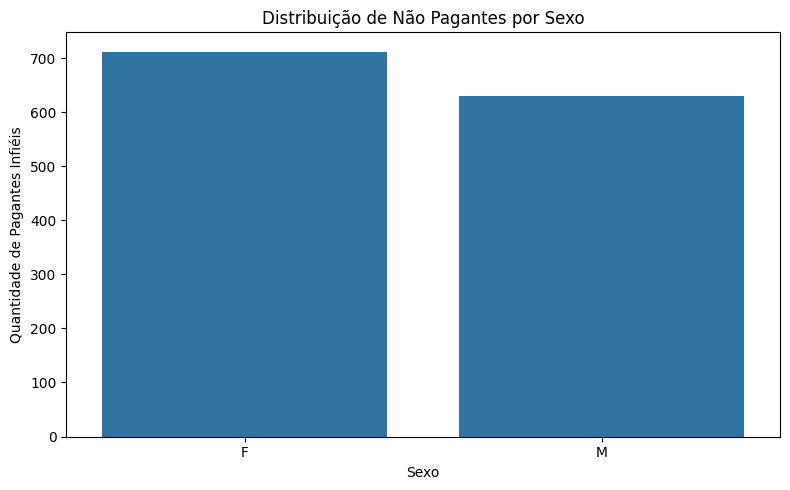

In [1038]:
sexo_counts = nao_pagantes_perfil['sexo'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sexo_counts.index, y=sexo_counts.values)
plt.title('Distribuição de Não Pagantes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Pagantes Infiéis')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()



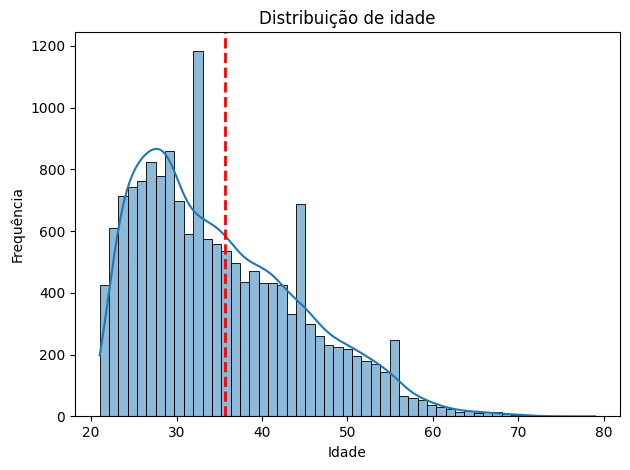

In [1039]:
idade_media = nao_pagantes_perfil['idade'].mean()
sns.histplot(data=pagantes_leais_perfil, x='idade', kde=True)
plt.axvline(idade_media, color='red', linestyle='dashed', linewidth=2, label=f'Média de Idade: {idade_media:.2f}')
plt.title('Distribuição de idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=1)

plt.tight_layout()
plt.show()

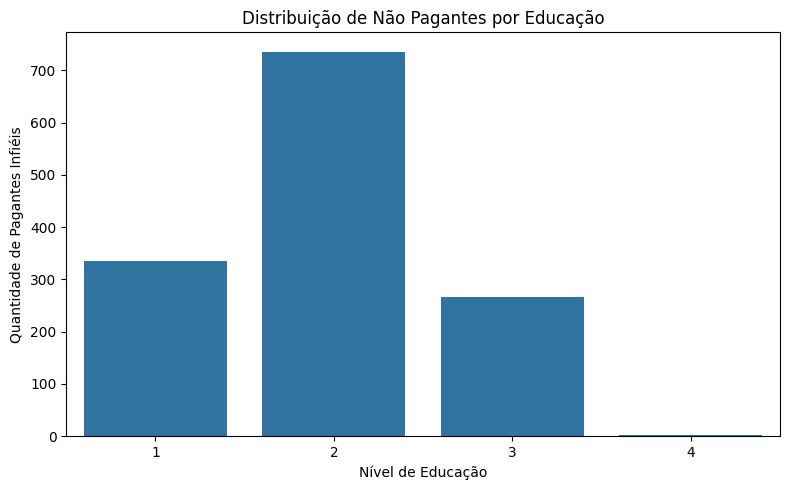

In [1040]:
educacao_counts = nao_pagantes_perfil['educacao'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=educacao_counts.index, y=educacao_counts.values)
plt.title('Distribuição de Não Pagantes por Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade de Pagantes Infiéis')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()


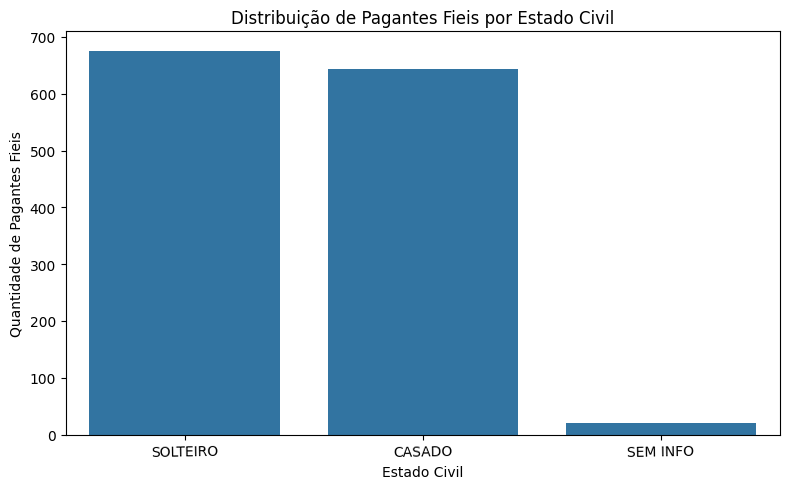

In [1041]:
estado_civil = nao_pagantes_perfil['estado_civil'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=estado_civil.index, y=estado_civil.values)
plt.title('Distribuição de Pagantes Fieis por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de Pagantes Fieis')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

## Modelo Preditivo - XGBoost

### Inicialização

In [1042]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [1043]:
predit_data = df.copy()

In [1044]:
predit_data.head()

,Unnamed: 0,ID,financiamento_max,sexo,educacao,estado_civil,ano_nasc,st_pagamento_lag_1,st_pagamento_lag_2,st_pagamento_lag_3,...,divida_lag_5,divida_lag_6,pago_lag_1,pago_lag_2,pago_lag_3,pago_lag_4,pago_lag_5,pago_lag_6,inadimplente,idade
0,0,16609,270000,M,2,SOLTEIRO,1996,1,-2,-2,...,0,0,0,0,0,0,0,0,1,29
1,1,19850,870000,F,1,SOLTEIRO,1991,0,0,0,...,12000,13463,1500,2016,5000,2000,1463,3365,0,34
2,2,15921,630000,F,1,SOLTEIRO,1997,0,0,0,...,44293,38215,4000,5000,2000,2540,3000,3000,0,28
3,3,22050,750000,F,2,CASADO,1996,0,0,0,...,325,325,35018,1000,20000,325,325,318,0,29
4,4,1315,150000,F,1,CASADO,1988,2,0,0,...,6461,4822,1200,1000,91,11283,0,1000,0,37


### Pré-processamento

In [1045]:
cat_cols = ['sexo', 'educacao', 'estado_civil']

for col in cat_cols:
    predit_data[col] = predit_data[col].fillna('Unknown')
    if predit_data[col].dtype == 'object':
        le = LabelEncoder()
        predit_data[col] = le.fit_transform(predit_data[col])

In [1046]:
X = predit_data.drop(['ID', 'inadimplente', 'ano_nasc'], axis=1)
y = predit_data['inadimplente']

In [1047]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [1048]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [1049]:
#sm = SMOTE(random_state=42)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [1050]:
#print('Distribuição após SMOTE:')
#print(pd.Series(y_train_res).value_counts())

### Implementação de modelo

In [1051]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Scale Pos Weight: {scale_pos_weight:.2f}")

Scale Pos Weight: 3.52


In [1052]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


In [1053]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [1054]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

### Resultados e Observações

In [1055]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      7009
           1       0.63      0.39      0.48      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.81      0.80      9000



Confusion Matrix:


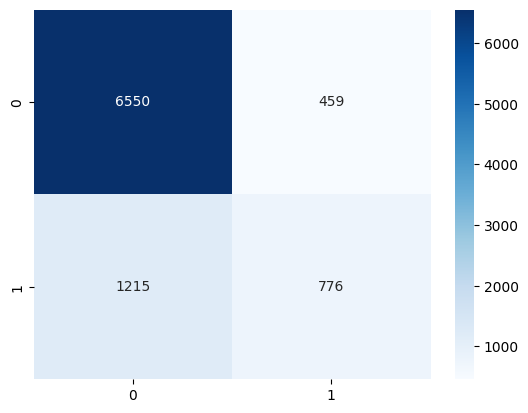

In [1056]:
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [1057]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.7662


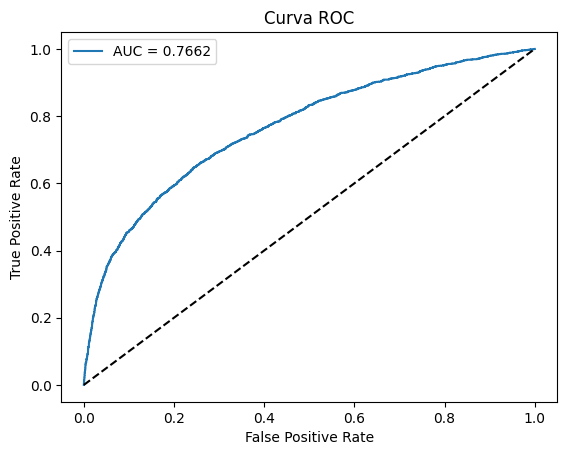

In [1058]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [1059]:
# 4. Importância das variáveis
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Variáveis mais importantes para prever inadimplência:")
print(feature_importances)

Variáveis mais importantes para prever inadimplência:
               feature  importance
5   st_pagamento_lag_1    0.370701
6   st_pagamento_lag_2    0.108752
7   st_pagamento_lag_3    0.051323
8   st_pagamento_lag_4    0.037802
9   st_pagamento_lag_5    0.033349
10  st_pagamento_lag_6    0.030995
18          pago_lag_2    0.026921
1    financiamento_max    0.023713
11        divida_lag_1    0.023661
17          pago_lag_1    0.021450
22          pago_lag_6    0.021246
20          pago_lag_4    0.020877
16        divida_lag_6    0.020310
19          pago_lag_3    0.020283
21          pago_lag_5    0.020182
4         estado_civil    0.020068
12        divida_lag_2    0.019990
14        divida_lag_4    0.019859
3             educacao    0.019421
13        divida_lag_3    0.019077
2                 sexo    0.018751
15        divida_lag_5    0.017773
0           Unnamed: 0    0.016995
23               idade    0.016500


##### Threshold

In [1060]:
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.40

y_pred = (y_proba >= threshold).astype(int)

In [1061]:
print("Classification Report com Threshold 0.45:")
print(classification_report(y_test, y_pred))

Classification Report com Threshold 0.45:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      7009
           1       0.56      0.46      0.50      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.68      0.69      9000
weighted avg       0.79      0.80      0.79      9000



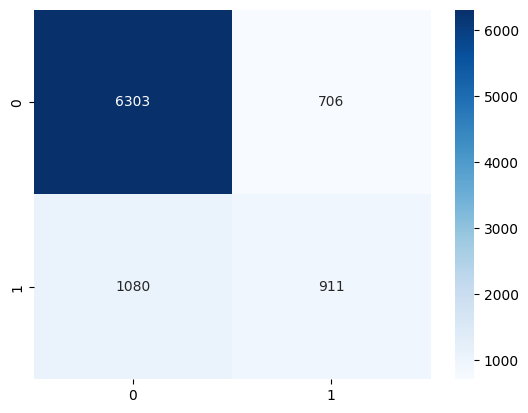

In [1062]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [1063]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.7662
